## 3장-3절. Support Vector Machine(SVM)
- 정의
    - 데이터 분포를 가정하기 힘들 때, margin을 최대화하는 boundary(초평면)찾는 방법
        - 초명면 : 어떤 n차원의 공간보다 한 차원이 낮은 n-1차원의 하위공간을 의미. 즉, 3차원 공간에서 초명면은 면이며, 2차원 공간에서 초명면은 선이된다.

- 서포트벡터 
    - 초평면에 가장 가까이 위치한 점을 support vector라고 한다. 즉, 서포트벡터는 margin 끝에 위치한 점인데, 이 점들과 초명면사이의 수직거리가 마진이 된다.
- C(Cost)
    - default = 1
    - 선으로 정확히 구분되지 않는 경우가 존재한다면 적당한 error를 허용하고, 이를 최소화 하도록 boundary를 결정하는데, 이것과 관련된 파라미터가 바로 Cost(C)이다.
        - C를 높게잡을수록 에러를 작게 허용하고, 낮을수록 높게 허용한다.
        - C를 낮게잡으면 이상치가 있을 가능성을 높게 봐서 일반적인 결정경계를 찾아낸다.(Soft Margin)
        - C를 높게 잡으면 이상치가 있을 가능성을 작게 보아서 더 세심한 결정경계를 찾아내는 것이다. (Hard Margin)
        - 즉, C가 너무 높으면 overfitting 될 가능성이 크고, C가 너무 낮으면 underfitting 될 가능성이 크다.
    
- 커널기법
    - Linear SVM(2차원) 으로는 데이터를 제대로 분류할 수 없는 상황들이 굉장히 많다. 이런 경우를 해결하기 위해 주어진 데이터를 고차원 특징 공간에서 사상해주는 것을 커널 기법이라고 한다.
    
- 종류
    - 2차원
        - Linear SVM
    - 커널기법 이용
        - RBF(radial basis function) SVM
        - polynomial kernel SVM
- 종속 변수 데이터 형태에 둘로 나뉜다.
    - 범주형 변수 : SVC (Support Vector Classifier)
    - 연속형 변수 : SVR (Support Vector Regression)
    - SVC : 마진안에 포함되거나, 반대방향으로 분류된 점들
    - SVR : margin 바깥에 위치한 점들 

## 01. Lienar SVM
- 하이퍼파리미터
    - C
        - 오차 허용기준. 작은 값을수록 많이 허용한다.
        - 과적합일 경우 값을 감소시키고, 과소적합을 경우 값을 증가시키면 된다.

In [1]:
# 기본 패키지
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 01-1. 데이터 불러오기 및 전처리

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, stratify=cancer.target)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 01-2. 모델 fitting 및 평가

In [3]:
from sklearn.svm import SVC, LinearSVC
svm = SVC(kernel='linear')
# svm = LineraSVC 와 같음

svm.fit(X_train_scaled, y_train)
pred_train = svm.predict(X_train_scaled)
pred_test = svm.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("train 정확도:",accuracy_score(y_train, pred_train))
print("test 정확도:",accuracy_score(y_test, pred_test))

train 정확도: 0.9849246231155779
test 정확도: 0.9824561403508771


### 01-3. C에 변화에 따른 성능 확인

In [4]:
C_list = [0.01, 0.05, 0.1, 0.5, 1, 10]

train_acc_list = []
test_acc_list = []

for C in C_list:
    svc = SVC(kernel='linear', C=C)
    svc.fit(X_train_scaled, y_train)
    
    train_acc_list.append(accuracy_score(y_train, svc.predict(X_train_scaled)))
    test_acc_list.append(accuracy_score(y_test, svc.predict(X_test_scaled)))

In [5]:
d = dict(C=C_list,
        train_accuracy = train_acc_list,
        test_accuracy = test_acc_list)
df = pd.DataFrame(d)
df

,C,train_accuracy,test_accuracy
0,0.01,0.967337,0.982456
1,0.05,0.977387,0.988304
2,0.10,0.979899,0.988304
3,0.50,0.982412,0.982456
4,1.00,0.984925,0.982456
5,10.00,0.989950,0.970760


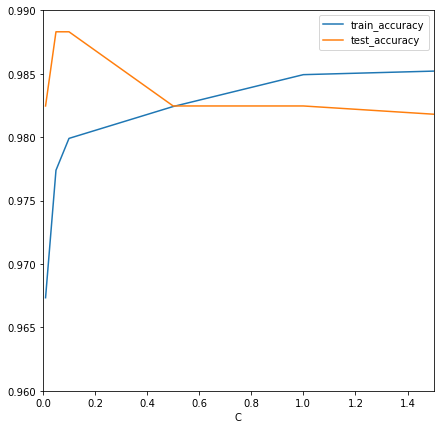

In [6]:
df.set_index('C').plot(figsize=(7,7))
plt.xlim(0,1.5)
plt.ylim(0.96,0.99)
plt.show()

---
---

## 02. 커널 서포트 벡터 머신 : RBF SVM
- 방사기저(RBF) 함수란?
    - 커널 서포트 벡터 머신의 기본 커널 함수
    - 기준점들이 되는 위치를 지정하고 각 샘플이 그 기준점들과 얼마나 떨어졌는지를 계산한다. => 유사도(거리)
    - 기준점 별 유사도 계산한 값은 원래 값보다 차원이 커지고 선형저으로 구분될 가능성이 커진다.

- 하이퍼파라미터
    - C
        - 오차 허용기준. 작은 값을수록 많이 허용한다.
        - 과적합일 경우 값을 감소시키고, 과소적합을 경우 값을 증가시키면 된다.
    - gamma
        - 방사기저함수의 규제의 역할을 한다.
        - 데이터 샘플이 영향력을 행사하는 거리를 결정한다.
        - gamma는 gussian 함수의 표준편차와 관련이 있는데, 클수록 작은 표준편차를 가진다. 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지는 반면 gamma가 낮을수록 거리가 커진다.
        - 즉, 모델이 과대적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가시키면 된다.

### 02-1. 모델 fitting

In [27]:
from sklearn.svm import SVC

rbf_model = SVC(kernel='rbf',
               gamma='auto',
               probability=True)
rbf_model.fit(X_train_scaled, y_train)

SVC(gamma='auto', probability=True)

### 02-2. 모델 평가

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

pred_train = rbf_model.predict(X_train_scaled)
pred_test = rbf_model.predict(X_test_scaled)

print("train 정확도:",accuracy_score(y_train, pred_train))
print("test 정확도:",accuracy_score(y_test, pred_test))

train 정확도: 0.9899497487437185
test 정확도: 0.9649122807017544


In [29]:
confusion_matrix(y_train, pred_train)

array([[144,   4],
       [  0, 250]], dtype=int64)

In [30]:
confusion_matrix(y_test, pred_test)

array([[ 62,   2],
       [  4, 103]], dtype=int64)

---
---

## 03. 커널 서포트 벡터 머신 : Polinomial kernerl SVM
- 하이퍼파라미터
    - C
    - degree
        - 차원(d)를 올림에 따라 모형의 복잡도를 올리 수 있음.
    - 위 내용들과 마찬가지로 C와 degree가 너무 높으면 과적합의 위험이 있고, 너무 낮으면 과소적합의 위험이 있다.

### 03-1. 모델 fitting

In [41]:
from sklearn.svm import SVC

poly_model = SVC(kernel='poly', degree=3, max_iter=10000)
poly_model.fit(X_train_scaled,y_train)

### 03-2. 모델 평가

In [42]:
pred_train = poly_model.predict(X_train_scaled)
pred_test = poly_model.predict(X_test_scaled)

print("train 정확도:",accuracy_score(y_train, pred_train))
print("test 정확도:",accuracy_score(y_test, pred_test))

train 정확도: 0.9120603015075377
test 정확도: 0.9239766081871345


In [43]:
confusion_matrix(y_train, pred_train)

array([[113,  35],
       [  0, 250]], dtype=int64)

In [44]:
confusion_matrix(y_test, pred_test)

array([[ 51,  13],
       [  0, 107]], dtype=int64)

### 02-3. GridSearchCV로 하이퍼파라미터 튜닝

In [48]:
from sklearn.model_selection import GridSearchCV
kernel = ['rbf','linear', 'poly']
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
degree = [1,2,3,4,5]

hyperparams = {'kernel':kernel,
              'C':C,
              'gamma':gamma,
              'degree':degree}

svc = SVC()
gs = GridSearchCV(svc,
                  hyperparams,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

In [49]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [50]:
print('GridSearchCV 최적 파라미터:',gs.best_params_)
print('GridSearchCV 최고 정확도:',gs.best_score_)
print('GridSearchCV 최고성능 모델:',gs.best_estimator_)

GridSearchCV 최적 파라미터: {'C': 0.001, 'degree': 1, 'gamma': 100, 'kernel': 'poly'}
GridSearchCV 최고 정확도: 0.9749367088607596
GridSearchCV 최고성능 모델: SVC(C=0.001, degree=1, gamma=100, kernel='poly')


In [51]:
pred_train = gs.predict(X_train_scaled)
pred_test = gs.predict(X_test_scaled)

print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

0.9824120603015075
0.9707602339181286


In [52]:
confusion_matrix(y_test,pred_test)

array([[ 61,   3],
       [  2, 105]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

